In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

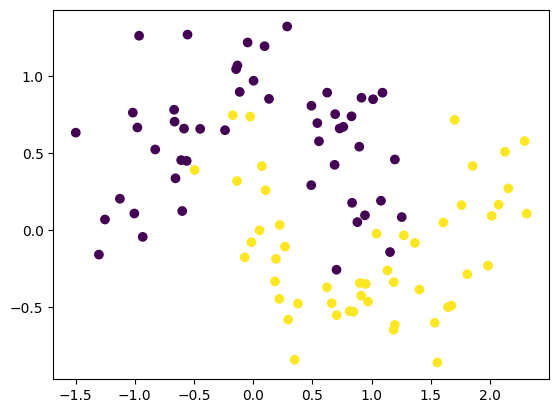

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

c:\Users\Jeevan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=1000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 877us/step


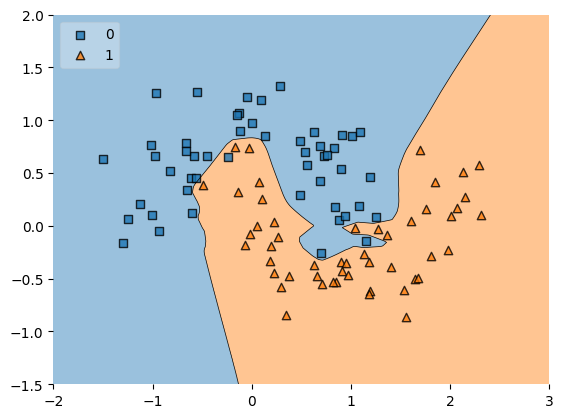

In [8]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

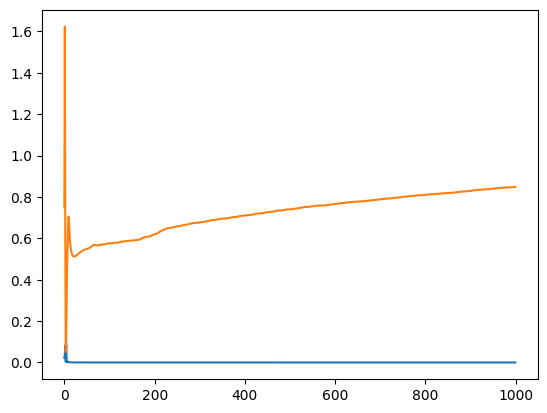

In [9]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [10]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=1000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 647us/step


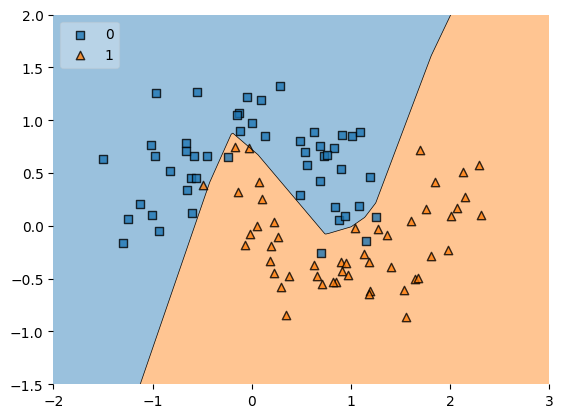

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

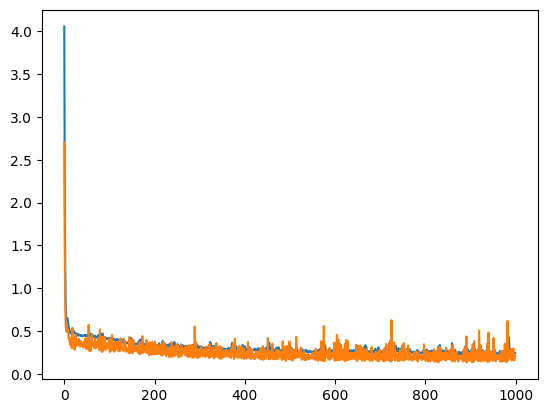

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [14]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

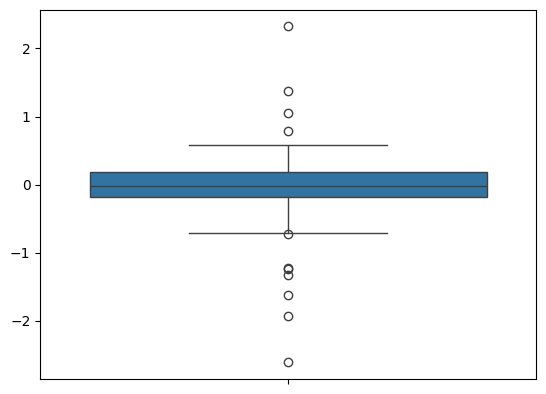

In [15]:
sns.boxplot(model1_weight_layer1)

<Axes: >

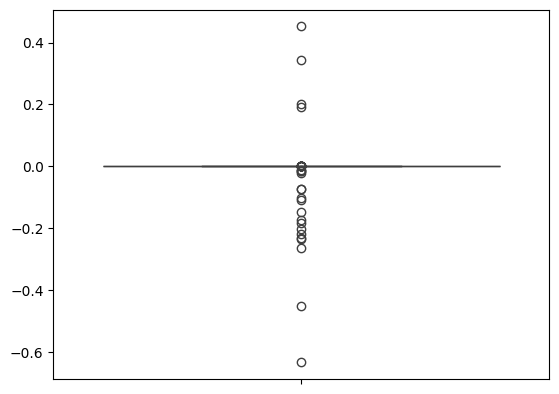

In [16]:
sns.boxplot(model2_weight_layer1)

In [17]:
model1_weight_layer1.min()

-2.6146238

In [18]:
model2_weight_layer1.min()

-0.6340017

C:\Users\Jeevan\AppData\Local\Temp\ipykernel_19920\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Jeevan\AppData\Local\Temp\ipykernel_19920\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

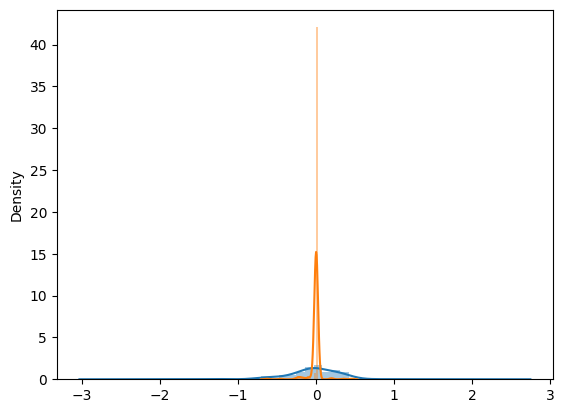

In [19]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [20]:
model1.get_weights()[0].reshape(256)

array([ 9.09501873e-03,  1.48186818e-01,  1.43113285e-01,  1.97333634e-01,
        2.29553536e-01, -2.80911148e-01, -3.62840621e-03, -2.98771441e-01,
       -5.97481988e-02,  2.88098663e-01,  2.67256629e-02,  1.72831401e-01,
        3.92309546e-01,  2.90548861e-01, -4.81433086e-02,  1.57598689e-01,
       -6.59920871e-01,  3.38565767e-01,  1.59887269e-01,  3.36264014e-01,
        1.71013489e-01,  1.30720794e-01, -1.59995165e-02, -2.63743103e-01,
       -1.10265777e-01, -7.25500286e-03,  1.05752654e-01, -3.08879977e-03,
        1.34713575e-01, -2.75393307e-01,  4.04368907e-01,  2.26911873e-01,
       -5.99519968e-01,  4.62322794e-02,  1.22770667e-01,  3.94257277e-01,
        1.18968748e-01, -6.56132758e-01,  3.18618579e-04, -2.31029660e-01,
       -4.20271885e-03, -4.46779341e-01,  3.06661904e-01,  2.78297991e-01,
       -2.65519053e-01,  3.46620642e-02,  2.90436357e-01, -4.76041108e-01,
        1.02932136e-04,  3.02250147e-01, -6.70620918e-01,  2.29882330e-01,
       -4.10104603e-01,  

In [21]:
model3 = Sequential()
model3.add(Dense(128,input_dim=2, activation="relu"))
model3.add(Dense(128, activation="relu"))
model3.add(Dense(1,activation='sigmoid'))

c:\Users\Jeevan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X, y, epochs=200, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 654us/step


<Axes: >

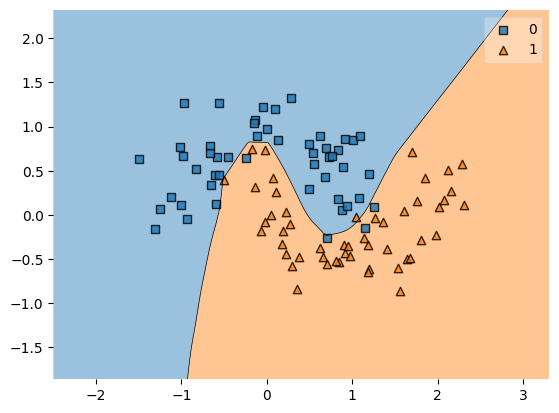

In [23]:
plot_decision_regions(X,y,clf=model3)

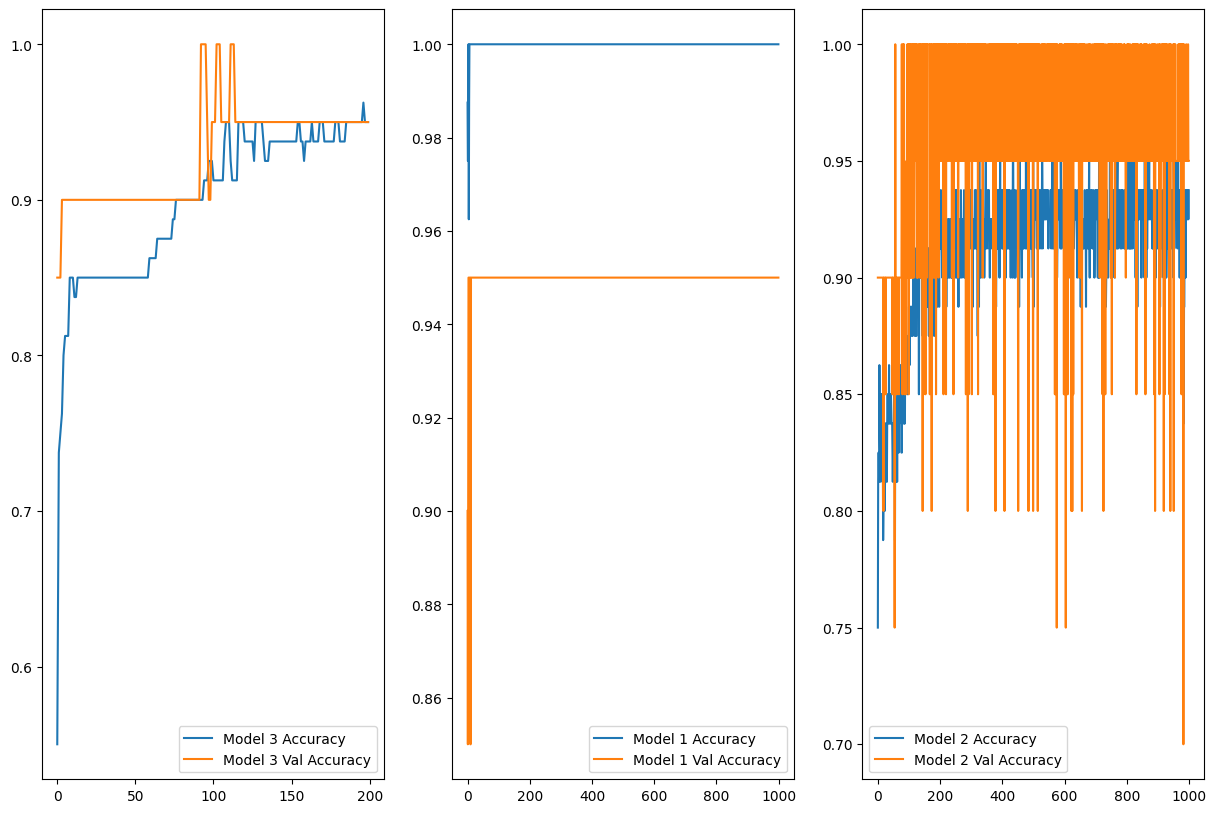

In [27]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(history3.history['accuracy'], label='Model 3 Accuracy')
ax1.plot(history3.history['val_accuracy'], label='Model 3 Val Accuracy')
ax1.legend()

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(history1.history['accuracy'], label='Model 1 Accuracy')
ax2.plot(history1.history['val_accuracy'], label='Model 1 Val Accuracy')
ax2.legend()

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(history2.history['accuracy'], label='Model 2 Accuracy')
ax3.plot(history2.history['val_accuracy'], label='Model 2 Val Accuracy')
ax3.legend()

plt.show()

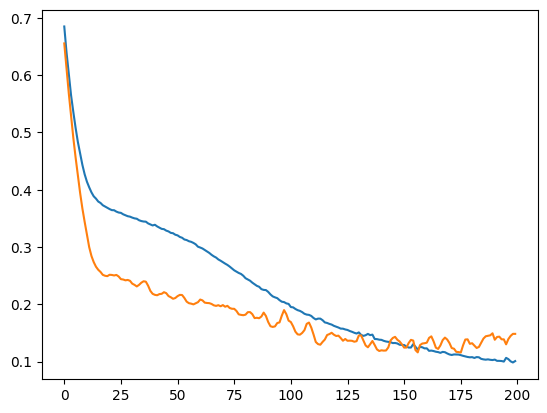

In [25]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [26]:
loss, accuracy = model1.evaluate(X, y, verbose=0)
print(f"Accuracy for model 1: {accuracy}")

loss, accuracy = model2.evaluate(X, y, verbose=0)
print(f"Accuracy for model 2: {accuracy}")

# Evaluate the model on the dataset
loss, accuracy = model3.evaluate(X, y, verbose=0)
print(f"Accuracy for model 3: {accuracy}")

Accuracy for model 1: 0.9900000095367432
Accuracy for model 2: 0.949999988079071
Accuracy for model 3: 0.949999988079071
